## Clean version of post_pro_landau_rel

We use it and then move the results to Notes_log.

In [3]:
#using DifferentialEquations
using Plots
using Statistics
using FFTW
FFTW.set_provider!("mkl")
#import Pkg; Pkg.add("FileIO")
using FileIO
using JLD2
using Base.Threads
using Distributions
using LaTeXStrings
using Printf
using LsqFit

In [4]:
include("aux_functions.jl")

temperature_fit (generic function with 1 method)

In [5]:
outputs = false # detailed output (no longer used)
average_outputs = true
full_outputs = false
animation = false # to run animations
phase_space_show = false #show phase space diagrams
phase_space_show = true
remote_server = false # if run in remote as a script avoid all plots 
save_plots = true # put true is you want so save your plots.
plots = true

true

We first introduce the name of the file with the data and retrieve the metadata.

In [9]:
file_name = "Results/norel_norm_undamped_rel_t400_L39.738_N85_n20_J3522_M16001_o5_Th3_alp2_ave.jld2"

"Results/norel_norm_undamped_rel_t400_L39.738_N85_n20_J3522_M16001_o5_Th3_alp2_ave.jld2"

In [22]:
data, run_name, par_grid, par_evolv, par_f, n0, x, t_series = retrieve_meta_data(file_name)
@show run_name
@show (N, L, J, dx, order) = par_grid
@show (t_i, t_f, M, M_g, dt) = par_evolv
@show (θ, nm, k) = par_f

dT = dt*(M-1)/(M_g-1)


freqs_space = fftshift(rfftfreq(J, 1/dx))

M_last = M_g  # number of last data point saved. Otherwise use M_g
freqs = fftshift(rfftfreq(M_last, 1/dT)) 

run_name = "norel_norm_undamped_rel_t400_L39.738_N85_n20_J3522_M16001_o5_Th3_alp2"
(N, L, J, dx, order) = par_grid = (800000, 39.738, 3522, 0.011282793867120954, 5)
(t_i, t_f, M, M_g, dt) = par_evolv = (0.0, 400.0, 16001, 1601, 0.025)
(θ, nm, k) = par_f = (0.001, 20, 0.1581152878146758)


0.0:0.0024984384759525295:1.9987507807620237

We can have data written out in full o in averaged format: In each case we use different functions. Data written in full has a `"full.jld2"` at the end, otherwise a `"ave.jld2"` is used.

For the full case we use:

```
v = retrieve_data(data, par_grid par_evolv);
```
```
Energy_K, Energy_E, EField_T, p_T, Q_T, S_T, T = get_averages_threads(v,par_grid,par_evolv, par_f);
```

For the averaged case we use:

```
M_last = 1601 # number of iterations already completed. 

n_t, S_t, Efield_t, averages = retrieve_average_data(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;
```



In [11]:

n_t, S_t, Efield_t, averages = retrieve_average_data(data, par_grid, par_evolv;M_last=M_last);

Energy_E,  Energy_K, EField_T, p_T, Q_T, S_T, T = averages;


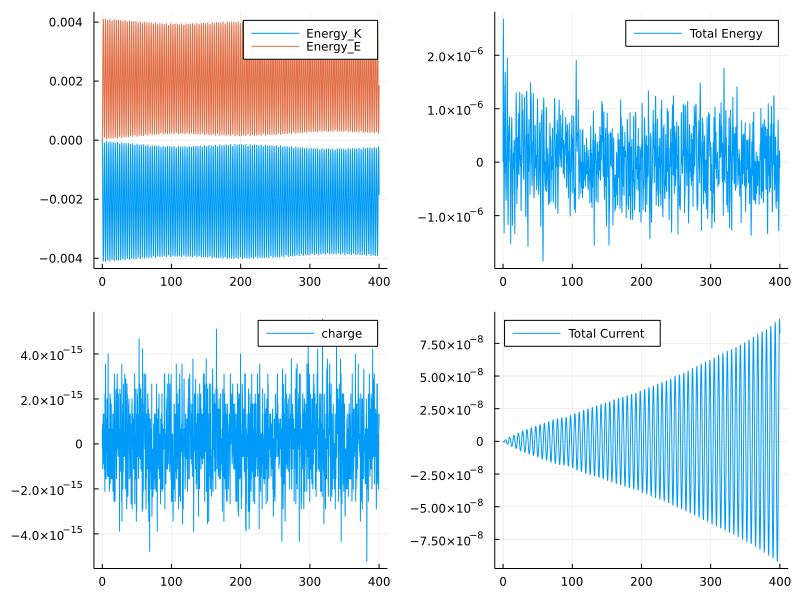

In [12]:

plot_averages(averages, t_series, N, run_name, save_plots)

#### Energy fit 

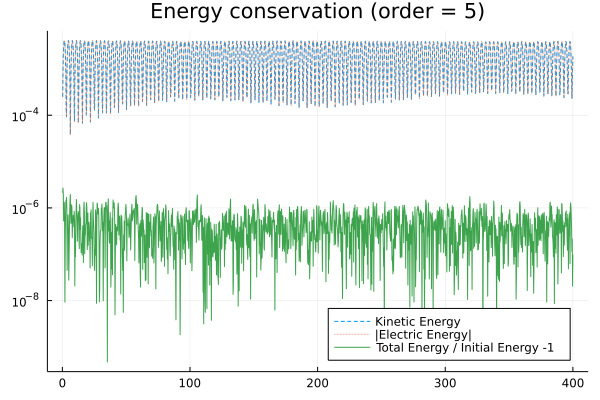

In [13]:
plot_energies(Energy_K, Energy_E, t_series, run_name, save_plots)

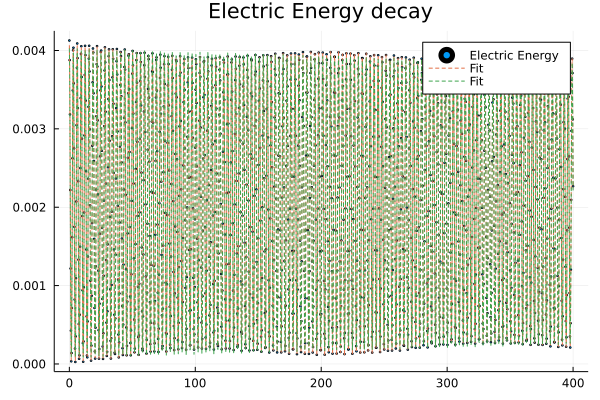

In [16]:
pe1 = [0.001; 0.001; 2.03; 2; 0.002; 0.001; 2.0; 0.0; 0.0]
pe2 = [0.01; -0.01; 1; 0; 0.002; 0.0]
fit_e_1, fit_e_2, plt = energy_fit(t_series, Energy_E, pe1, pe2, 1, M_last, run_name, save_plots, yscale=:identity)
plt 

In [17]:
fit_e_1

9-element Vector{Float64}:
  0.0020502155276045917
  5.039024594434988e-5
  2.027635371154509
  6.345690430337964
 -0.0003358830579111077
  0.0019667201803559324
  1.99859474123304
  0.017465375859802772
  0.00020549260871791195

#### Temperature Fit

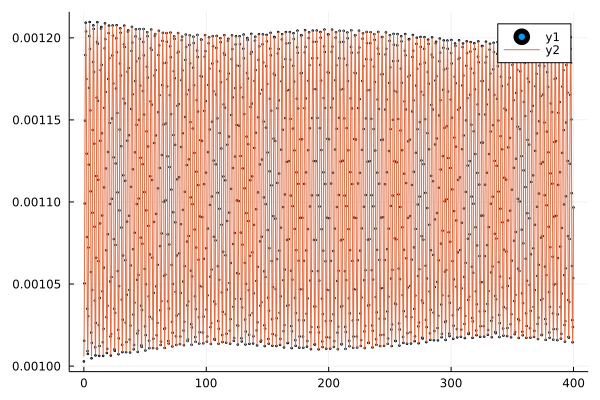

In [14]:
N_i = 1
N_f = M_last
p_tl001 = [0.001; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_T_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [15]:
#model_tl001(x,p) = p[1] + p[2]*cos(p[3]*x + p[4])*exp(-p[5]*x) + p[6]*cos(p[7]*x + p[8])*exp(-p[9]*x)
fit_T_1.param

9-element Vector{Float64}:
  0.0011075629178367128
 -2.539600079603148e-6
  2.027635613940527
  0.06243459044499647
 -0.0003363494104947458
 -9.914225002085228e-5
  1.9985947350845683
  0.017467277743187723
  0.0002055007935678624

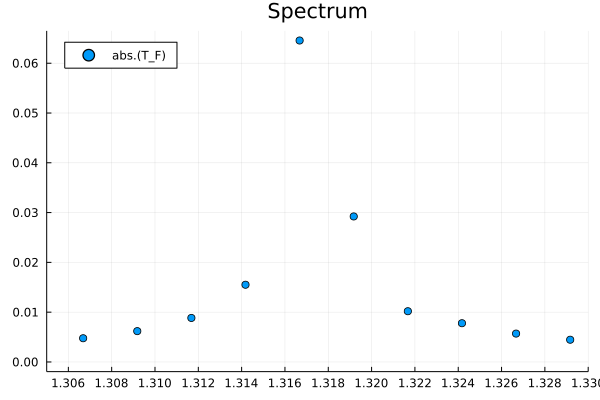

In [40]:
ΔT = T .- sum(T)/length(T)
T_F = rfft(ΔT)
Plots.scatter(freqs,abs.(fftshift(T_F)), title = "Spectrum", label="abs.(T_F)",legend=:topleft, xticks=-2:0.002:2, xlim=(1.305,1.33))

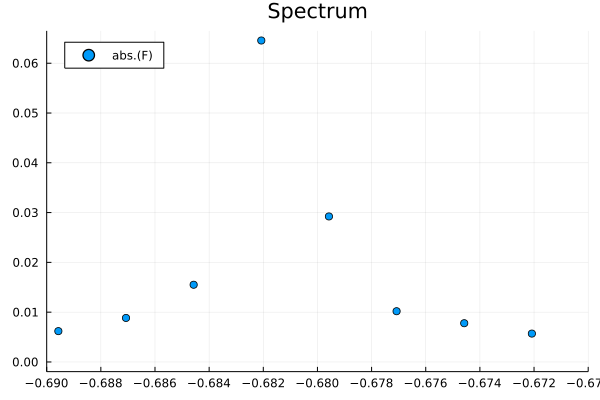

In [27]:
Plots.scatter(freqs,abs.(fftshift(T_F)), title = "Spectrum", label="abs.(F)",legend=:topleft
, xticks=-2:0.002:2
, xlim=(-0.69,-0.67)
)

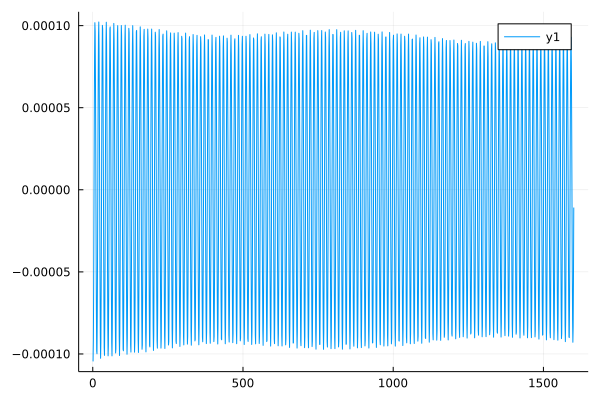

In [41]:
plot(ΔT)

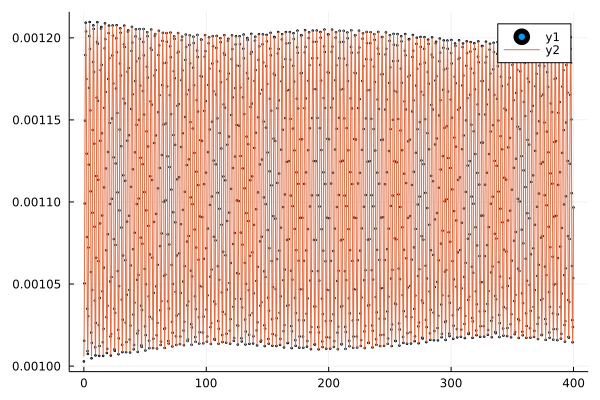

In [45]:
N_i = 1
N_f = M_last
p_tl001 = [0.00; 0.001; 2.02; 0; 0.0; 0.; 2.0; 0; 0]
fit_ΔT_1, plt = temperature_fit(t_series, T, p_tl001, N_i, N_f, run_name, save_plots)
plt

In [46]:
fit_ΔT_1.param

9-element Vector{Float64}:
  0.0011075629178287276
 -2.539605462204334e-6
  2.027635609294808
  0.06243555405722648
 -0.000336339263876
 -9.914225041753589e-5
  1.998594735081582
  0.0174672677012795
  0.00020550081329791936

#### Density study

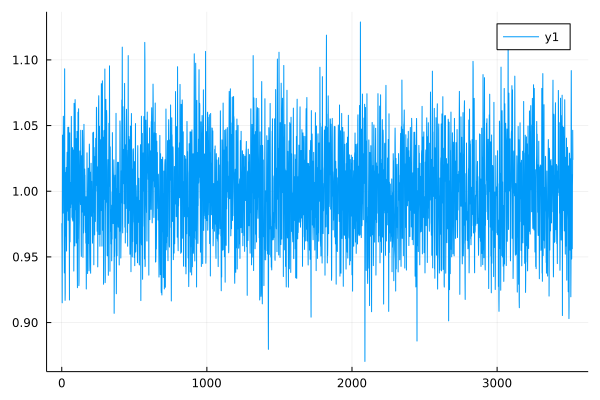

In [18]:
plot(n_t[:,M_last])

In [35]:
n_F = rfft(n_t[:,M_last].-1); # we take out the background
#n_F = rfft(n_t[:,1].-1); # we take out the background

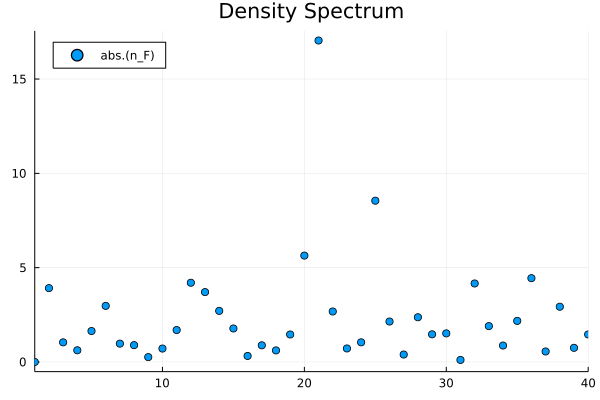

In [38]:
Plots.scatter(abs.((n_F)), title = "Density Spectrum", label="abs.(n_F)",legend=:topleft
    #, xticks=-2:0.002:2
    , xlim=(1,40)
    )
    #recall that it is shifted one position to the right, so the frequency is 20.

In [1]:
3/2*0.1^2

0.015000000000000003